# Process timecourse data out of Spark 10M

## This is a script useful for processing plate reader data when measuring OD and a FP

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import string
import seaborn as sns

import os
import sys

path = '/Users/andrewng/Documents/PlateReaderTools'
if not path in sys.path:
    sys.path.insert(1, path)
del path

from plate_reader_tools import *
import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")

%matplotlib inline

In [2]:
fname1 = 'igRNA_AHN_20170116 (Modified)_20170324_190926.xlsx'
fname2 = 'igRNA_AHN_20170116 (Modified)_20170325_192434.xlsx'

date = fname1[-20:-12]

In [4]:
[d1,t1] = readplate(fname1,'Result sheet',82,8,12,['OD','sfGFP','mRFP'],28,0)
[d2,t2] = readplate(fname2,'Result sheet',82,8,12,['OD','sfGFP','mRFP'],72,0)

In [6]:
d1['OD']

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0.1162,0.1093,0.1112,0.1219,0.1162,0.1263,0.1034,0.1046,0.0968,0.1113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1200,0.1170,0.1230,0.1340,0.1293,0.1356,0.1112,0.1146,0.1023,0.1207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.1508,0.1250,0.1325,0.1443,0.1414,0.1460,0.1215,0.1267,0.1088,0.1308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.1582,0.1305,0.1394,0.1514,0.1514,0.1563,0.1334,0.1397,0.1187,0.1423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.1636,0.1367,0.1463,0.1603,0.1603,0.1665,0.1454,0.1519,0.1284,0.1517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.1758,0.1424,0.1544,0.1692,0.1687,0.1770,0.1546,0.1628,0.1379,0.1625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.1788,0.1481,0.1622,0.1778,0.1783,0.1892,0.1655,0.1731,0.1477,0.1718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.1873,0.1549,0.1713,0.1894,0.1908,0.2026,0.1766,0.1852,0.1581,0.1831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.2017,0.1641,0.1828,0.2029,0.2037,0.2174,0.1893,0.1989,0.1693,0.1960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.2118,0.1728,0.1940,0.2175,0.2181,0.2341,0.2020,0.2137,0.1803,0.2098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
GFPtitles = ['pCCW12 guide 1', 'pCCW12 guide 2', 'pCCW12 guide 3', 'gfp 2 on', 'gfp 2 off']
RFPtitles = ['pTDH3 guide 1', 'pTDH3 guide 2', 'pTDH3 guide 3', 'rfp 2 on', 'rfp 2 off']

titles = GFPtitles + RFPtitles

In [8]:
OD1 = d1['OD']
OD2 = d2['OD']

[twostep1, maxind1, maxgrowth1, maxOD1] = computegrowthrate(OD1,t1)
[twostep2, maxind2, maxgrowth2, maxOD2] = computegrowthrate(OD2,t2)

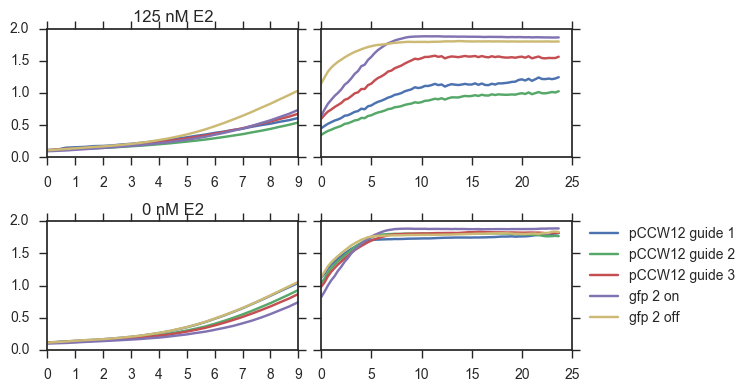

In [20]:
#Compare growth curves for pTDH3 repression

wells_on = ['A1','A2','A3','A9','A10']
wells_off = ['B1','B2','B3','B9','B10']

f, ax = plt.subplots(2, 2, sharey=True)

for well,label in zip(wells_on,GFPtitles):
    ax[0,0].plot(t1, OD1.loc[:,well],label = label)
    ax[0,1].plot(t2, OD2.loc[:,well],label = label)
    
for well,label in zip(wells_off,GFPtitles):
    ax[1,0].plot(t1, OD1.loc[:,well],label = label)
    ax[1,1].plot(t2, OD2.loc[:,well],label = label)

ax[0,0].set_title('125 nM E2')
ax[1,0].set_title('0 nM E2')
plt.tight_layout()
ax[1,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

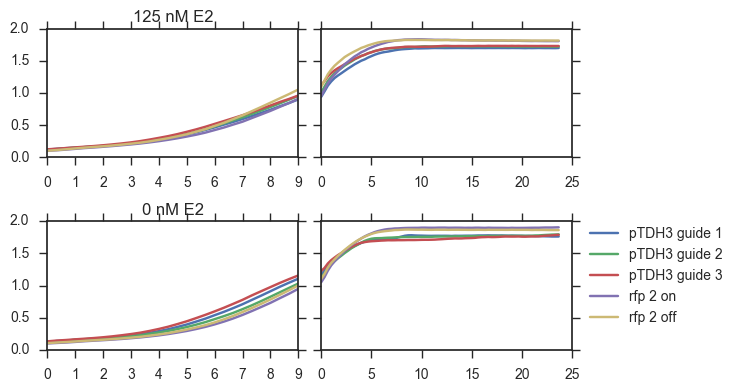

In [21]:
#Compare growth curves for pCCW12 repression

wells_on = ['A4','A5','A6','A7','A8']
wells_off = ['B4','B5','B6','B7','B8']

f, ax = plt.subplots(2, 2, sharey=True)

for well,label in zip(wells_on,RFPtitles):
    ax[0,0].plot(t1, OD1.loc[:,well],label = label)
    ax[0,1].plot(t2, OD2.loc[:,well],label = label)
    
for well,label in zip(wells_off,RFPtitles):
    ax[1,0].plot(t1, OD1.loc[:,well],label = label)
    ax[1,1].plot(t2, OD2.loc[:,well],label = label)

ax[0,0].set_title('125 nM E2')
ax[1,0].set_title('0 nM E2')
plt.tight_layout()
ax[1,1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [42]:
OD = d['OD']
sfGFP = d['sfGFP']
mRFP = d['mRFP']

nGFP = pd.DataFrame(index = sfGFP.index.tolist(), columns = sfGFP.columns.tolist())
nRFP = pd.DataFrame(index = mRFP.index.tolist(), columns = mRFP.columns.tolist())

for i in range(len(sfGFP)):
    for j in range(len(sfGFP.iloc[i,:])):
        try: 
            nGFP.iloc[i,j] = sfGFP.iloc[i,j]/OD.iloc[i,j]
        except TypeError:
            nGFP.iloc[i,j] = np.nan
            
for i in range(len(mRFP)):
    for j in range(len(mRFP.iloc[i,:])):
        try: 
            nRFP.iloc[i,j] = mRFP.iloc[i,j]/OD.iloc[i,j]
        except TypeError:
            nRFP.iloc[i,j] = np.nan

In [43]:
[twostep, maxind, maxgrowth, maxOD] = computegrowthrate(OD,t)

In [44]:
nGFP_exp = exponentialvalues(maxind,nGFP)
nRFP_exp = exponentialvalues(maxind,nRFP)

In [45]:
exponentialvalues(maxind,OD)

array([[ 0.34333333,  0.33246667,  0.38073333,  0.26293333,  0.3533    ,
         0.30443333,  0.27423333,  0.37193333,  0.3235    ,  0.33203333,
         0.33713333,  0.16686667],
       [ 0.36736667,  0.20563333,  0.21923333,  0.29606667,  0.25326667,
         0.17916667,  0.25493333,  0.29113333,  0.30806667,  0.1853    ,
         0.29886667,  0.18376667],
       [ 0.16646667,  0.1769    ,  0.17143333,  0.16633333,  0.2658    ,
         0.19406667,  0.1842    ,  0.168     ,  0.17863333,  0.1816    ,
         0.1988    ,  0.1941    ],
       [ 0.3427    ,  0.23693333,  0.24563333,  0.19496667,  0.43243333,
         0.30886667,  0.13836667,  0.324     ,  0.37103333,  0.19793333,
         0.2052    ,  0.21826667],
       [ 0.3013    ,  0.17233333,  0.2215    ,  0.2306    ,  0.28306667,
         0.17793333,  0.20633333,  0.22696667,  0.18966667,  0.18283333,
         0.22596667,  0.21626667],
       [ 0.16823333,  0.5184    ,  0.3237    ,  0.17896667,  0.29313333,
         0.19316667,  

In [108]:
OD_36 = tptoplate(36,OD)
nGFP_36 = tptoplate(36,nGFP)
nRFP_36 = tptoplate(36,nRFP)

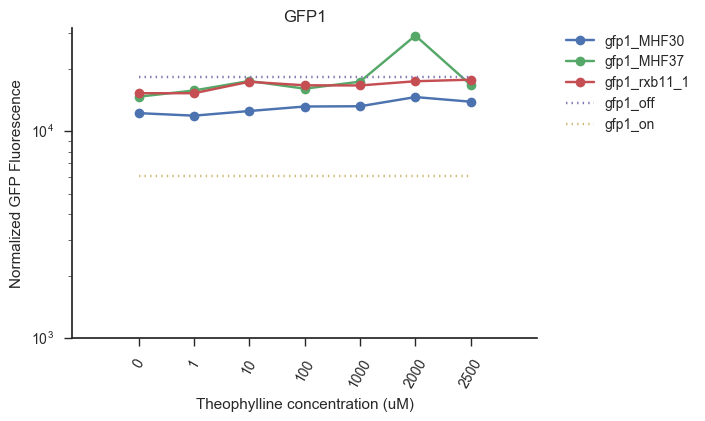

In [122]:
#Compare nGFP at exponential time point

sns.set_palette('deep')

plt.figure()

for i in range(len(GFPtitles[0:3])):
    plt.plot(ic,nGFP_36[:7,i],'o-',label=GFPtitles[i])
    
plt.plot(ic,np.ones(len(ic))*nGFP_36[-1,0],':', label = 'gfp1_off')
plt.plot(ic,np.ones(len(ic))*nGFP_36[-1,1],':', label = 'gfp1_on')

plt.title('GFP1')
plt.ylabel('Normalized GFP Fluorescence')
plt.yscale('log')
plt.ylim([10**3,10**4.5])
plt.xlabel('Theophylline concentration (uM)')
plt.xticks(ic, concs[::-1], rotation='60')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfp1_12hr' + '.svg'
dest = date + 'gfp1_12hr' + '.png'


sns.despine()

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

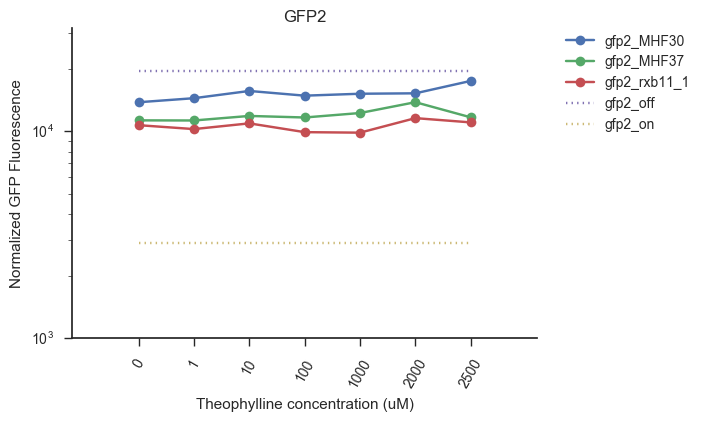

In [123]:
#Compare nGFP at exponential time point

sns.set_palette('deep')

plt.figure()

for i in range(len(GFPtitles[3:6])):
    plt.plot(ic,nGFP_36[:7,i+3],'o-',label=GFPtitles[i+3])
    
plt.plot(ic,np.ones(len(ic))*nGFP_36[-1,3],':', label = 'gfp2_off')
plt.plot(ic,np.ones(len(ic))*nGFP_36[-1,4],':', label = 'gfp2_on')

plt.title('GFP2')
plt.ylabel('Normalized GFP Fluorescence')
plt.yscale('log')
plt.ylim([10**3,10**4.5])
plt.xlabel('Theophylline concentration (uM)')
plt.xticks(ic, concs[::-1], rotation='60')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfp2_12hr' + '.svg'
dest = date + 'gfp2_12hr' + '.png'


sns.despine()

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

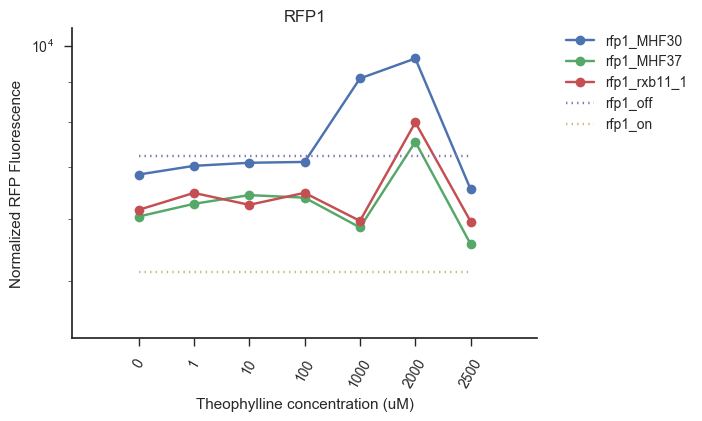

In [129]:
#Compare nRFP at exponential time point

sns.set_palette('deep')

plt.figure()

for i in range(len(RFPtitles[0:3])):
    plt.plot(ic,nRFP_36[:7,i+6],'o-',label=RFPtitles[i])
    
plt.plot(ic,np.ones(len(ic))*nRFP_36[-1,6],':', label = 'rfp1_off')
plt.plot(ic,np.ones(len(ic))*nRFP_36[-1,7],':', label = 'rfp1_on')

plt.title('RFP1')
plt.ylabel('Normalized RFP Fluorescence')
plt.yscale('log')
#plt.ylim([10**3,10**4.5])
plt.xlabel('Theophylline concentration (uM)')
plt.xticks(ic, concs[::-1], rotation='60')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'rfp1_12hr' + '.svg'
dest = date + 'rfp1_12hr' + '.png'


sns.despine()

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

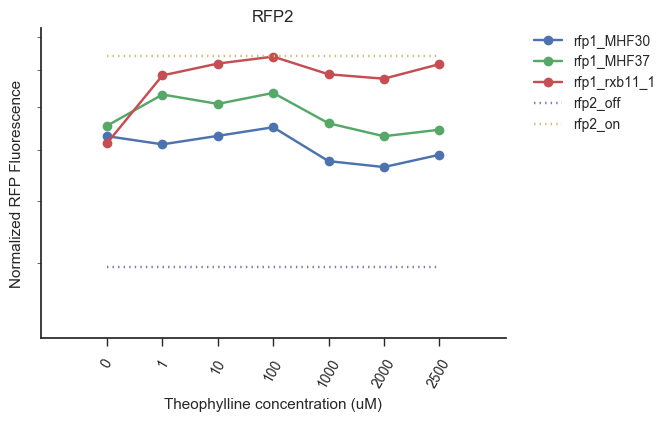

In [130]:
#Compare nRFP at exponential time point

sns.set_palette('deep')

plt.figure()

for i in range(len(RFPtitles[3:])):
    plt.plot(ic,nRFP_36[:7,i+9],'o-',label=RFPtitles[i])
    
plt.plot(ic,np.ones(len(ic))*nRFP_36[-1,9],':', label = 'rfp2_off')
plt.plot(ic,np.ones(len(ic))*nRFP_36[-1,10],':', label = 'rfp2_on')

plt.title('RFP2')
plt.ylabel('Normalized RFP Fluorescence')
plt.yscale('log')
#plt.ylim([10**3,10**4.5])
plt.xlabel('Theophylline concentration (uM)')
plt.xticks(ic, concs[::-1], rotation='60')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'rfp2_12hr' + '.svg'
dest = date + 'rfp2_12hr' + '.png'


sns.despine()

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

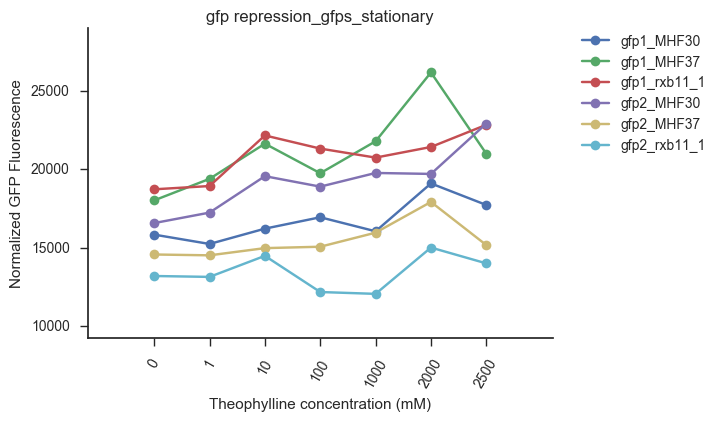

In [115]:
#Compare nGFP at exponential time point

sns.set_palette('deep')

plt.figure()

for i in range(len(GFPtitles)):
    plt.plot(ic,GFP_40[:7,i],'o-',label=GFPtitles[i])
    
    plt.title('gfp repression_gfps_stationary')
    plt.ylabel('Normalized GFP Fluorescence')
    #plt.yscale('log')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation='60')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfprepression_tp40' + '.svg'
dest = date + 'gfprepression_tp40' + '.png'


sns.despine()

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

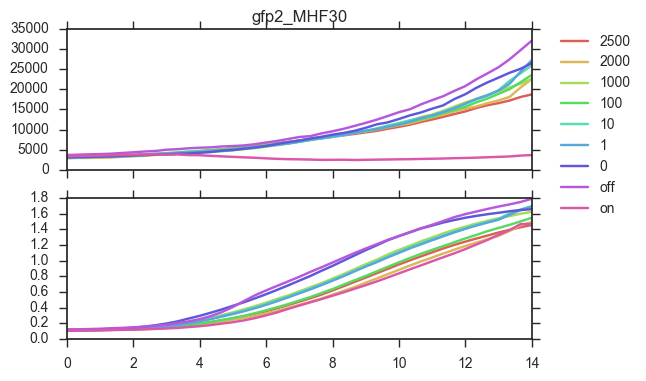

In [139]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

wells = list()
num = 4
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H4','H5']
labels = ['2500','2000','1000','100','10','1','0','off', 'on']

color=iter(sns.color_palette('hls',len(wells)))

for i in range(len(wells)):
    c = next(color)
    ax1.plot(t, nGFP.loc[:,wells[i]],color = c,label = labels[i])
    ax2.plot(t, OD.loc[:,wells[i]],color = c,label = labels[i])
    
ax1.set_title('gfp2_MHF30')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


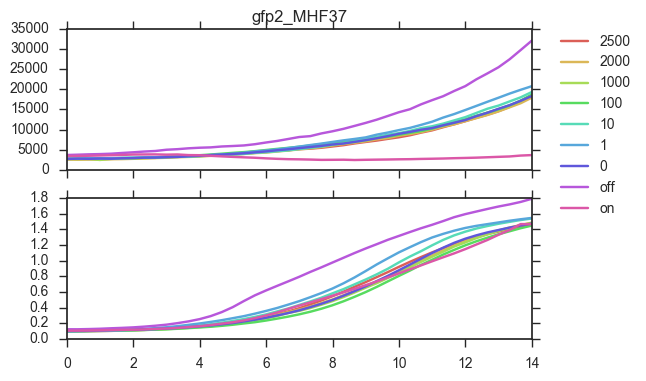

In [140]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

wells = list()
num = 5
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H4','H5']
labels = ['2500','2000','1000','100','10','1','0','off', 'on']

color=iter(sns.color_palette('hls',len(wells)))

for i in range(len(wells)):
    c = next(color)
    ax1.plot(t, nGFP.loc[:,wells[i]],color = c,label = labels[i])
    ax2.plot(t, OD.loc[:,wells[i]],color = c,label = labels[i])
    
ax1.set_title('gfp2_MHF37')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


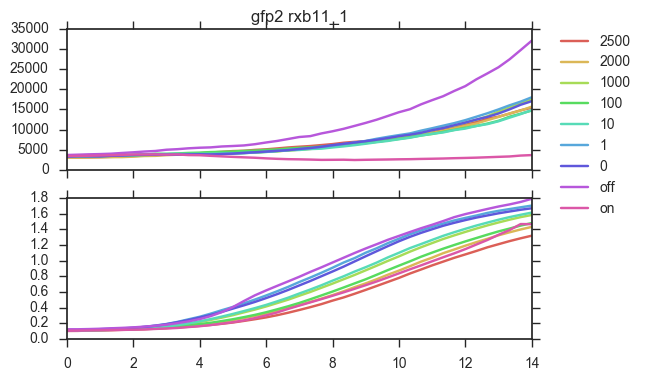

In [141]:
from string import ascii_uppercase

wells = list()
num = 6
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H4','H5']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for i in range(len(wells)):
    c = next(color)
    ax1.plot(t, nGFP.loc[:,wells[i]],color = c,label = labels[i])
    ax2.plot(t, OD.loc[:,wells[i]],color = c,label = labels[i])

ax1.set_title('gfp2 rxb11_1')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

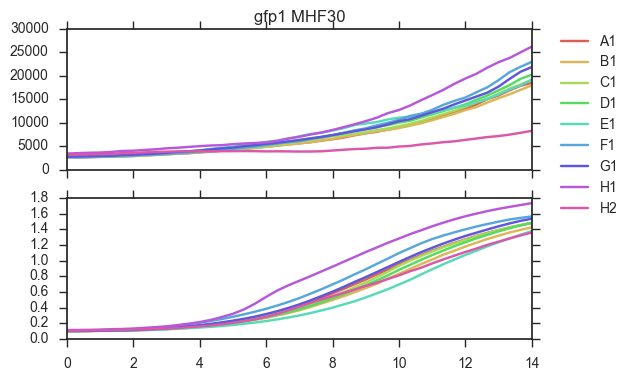

In [87]:
from string import ascii_uppercase

wells = list()
num = 1
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H1','H2']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nGFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('gfp1 MHF30')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

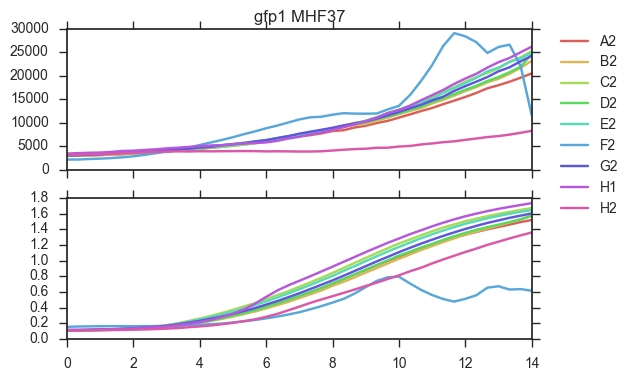

In [88]:
from string import ascii_uppercase

wells = list()
num = 2
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H1','H2']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nGFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('gfp1 MHF37')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

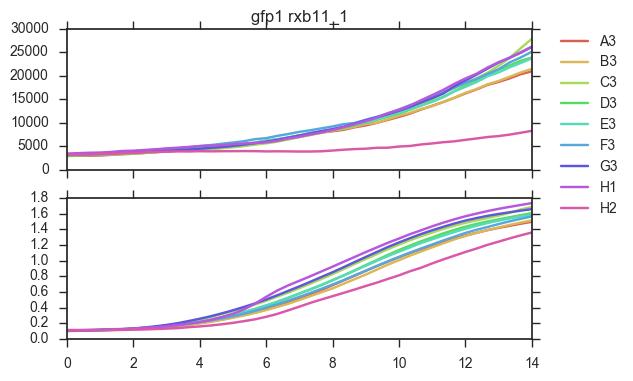

In [89]:
from string import ascii_uppercase

wells = list()
num = 3
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H1','H2']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nGFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('gfp1 rxb11_1')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

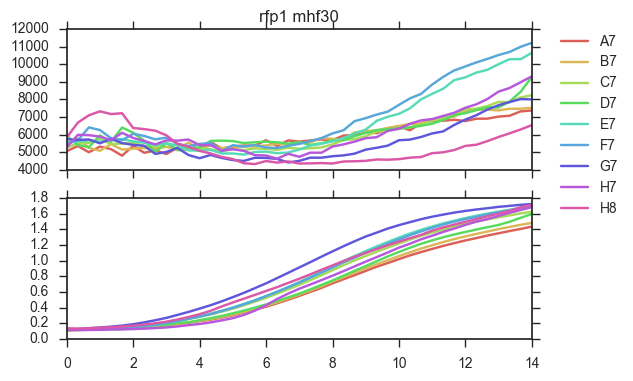

In [100]:
from string import ascii_uppercase

wells = list()
num = 7
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H7','H8']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nRFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('rfp1 mhf30')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

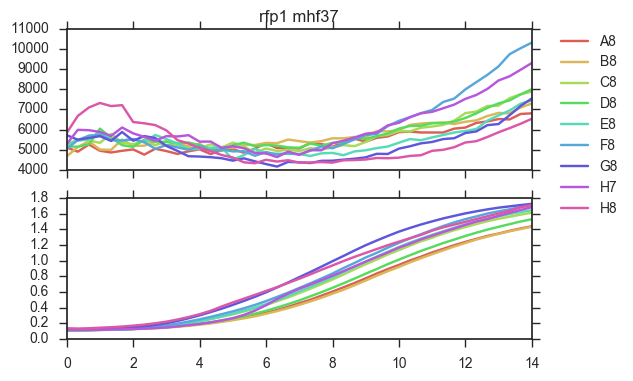

In [101]:
from string import ascii_uppercase

wells = list()
num = 8
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H7','H8']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nRFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('rfp1 mhf37')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

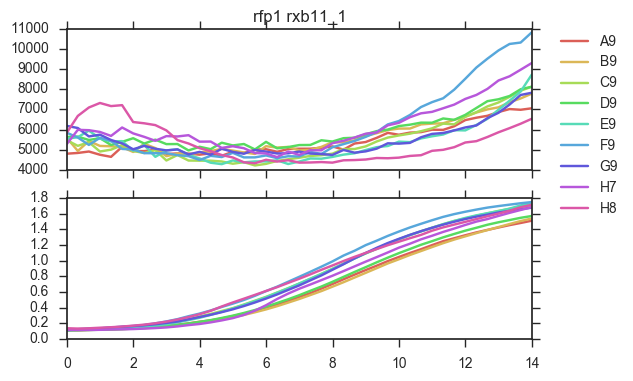

In [102]:
from string import ascii_uppercase

wells = list()
num = 9
for c in ascii_uppercase[0:7]:
    wells.append(c + str(num))
    
wells = wells + ['H7','H8']

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
color=iter(sns.color_palette('hls',len(wells)))

for well in wells:
    c = next(color)
    ax1.plot(t, nRFP.loc[:,well],color = c,label = well)
    ax2.plot(t, OD.loc[:,well],color = c,label = well)

ax1.set_title('rfp1 rxb11_1')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

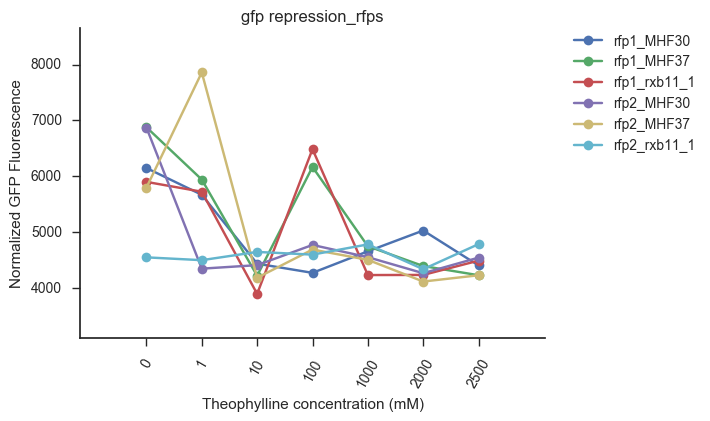

In [47]:
#Compare nRFP at exponential time point

plt.figure()

for i in range(len(RFPtitles)):
    plt.plot(ic,nGFP_exp[:7,i+6],'o-',label=RFPtitles[i])
    
    plt.title('gfp repression_rfps')
    plt.ylabel('Normalized GFP Fluorescence')
    #plt.yscale('log')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation='60')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfprepression_rfps' + '.svg'
dest = date + 'gfprepression_rfps' + '.png'


sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

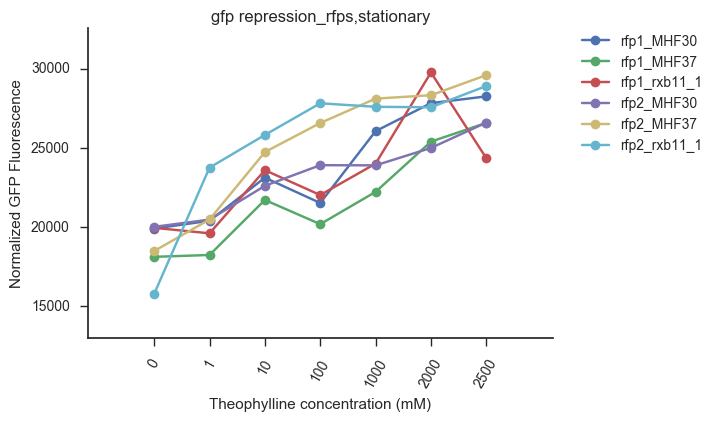

In [66]:
#Compare nRFP at exponential time point

plt.figure()

for i in range(len(RFPtitles)):
    plt.plot(ic,GFP_40[:7,i+6],'o-',label=RFPtitles[i])
    
    plt.title('gfp repression_rfps,stationary')
    plt.ylabel('Normalized GFP Fluorescence')
    #plt.yscale('log')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation='60')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfprepression_rfps_tp40' + '.svg'
dest = date + 'gfprepression_rfps_tp40' + '.png'


sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

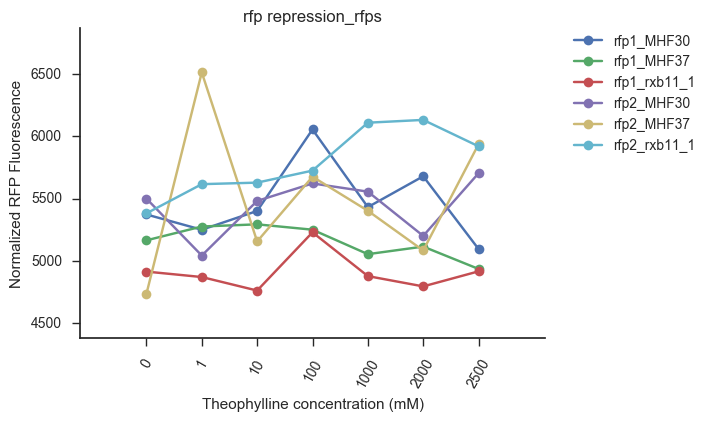

In [48]:
#Compare nRFP at exponential time point

plt.figure()

for i in range(len(RFPtitles)):
    plt.plot(ic,nRFP_exp[:7,i+6],'o-',label=RFPtitles[i])
    
    plt.title('rfp repression_rfps')
    plt.ylabel('Normalized RFP Fluorescence')
    #plt.yscale('log')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation='60')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'rfprepression' + '.svg'
dest = date + 'rfprepression' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

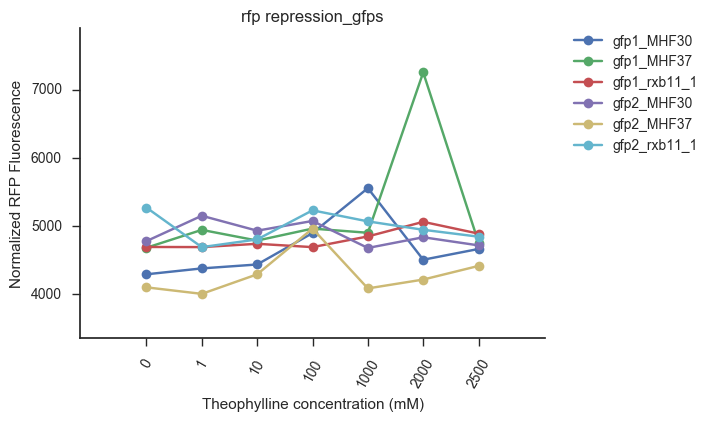

In [49]:
#Compare nRFP at exponential time point

plt.figure()

for i in range(len(RFPtitles)):
    plt.plot(ic,nRFP_exp[:7,i],'o-',label=GFPtitles[i])
    
    plt.title('rfp repression_gfps')
    plt.ylabel('Normalized RFP Fluorescence')
    #plt.yscale('log')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation='60')
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'rfprepression_gfps' + '.svg'
dest = date + 'rfprepression_gfps' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

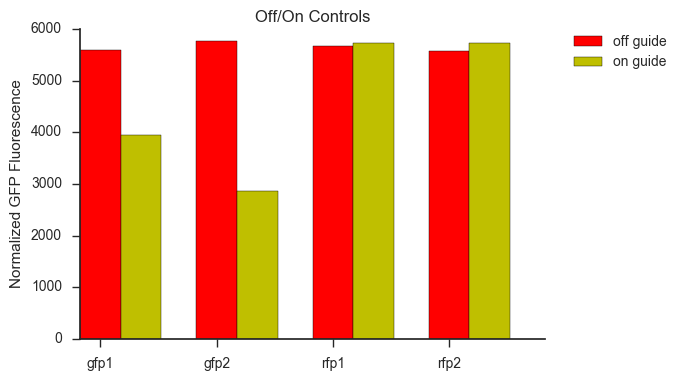

In [94]:
#Plot controls

N = 4
gfp_off = [nGFP_exp[-1,0],nGFP_exp[-1,3],nGFP_exp[-1,6],nGFP_exp[-1,9]]
gfp_on = [nGFP_exp[-1,1],nGFP_exp[-1,4],nGFP_exp[-1,7],nGFP_exp[-1,10]]

rfp_off = [nRFP_exp[-1,0],nRFP_exp[-1,3],nRFP_exp[-1,6],nRFP_exp[-1,9]]
rfp_on = [nRFP_exp[-1,1],nRFP_exp[-1,4],nRFP_exp[-1,7],nRFP_exp[-1,10]]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, gfp_off, width, color='r')
rects2 = ax.bar(ind + width, gfp_on, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized GFP Fluorescence')
ax.set_title('Off/On Controls')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('gfp1', 'gfp2', 'rfp1', 'rfp2'))

ax.legend((rects1[0], rects2[0]), ('off guide', 'on guide'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfp_controls' + '.svg'
dest = date + 'gfp_controls' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

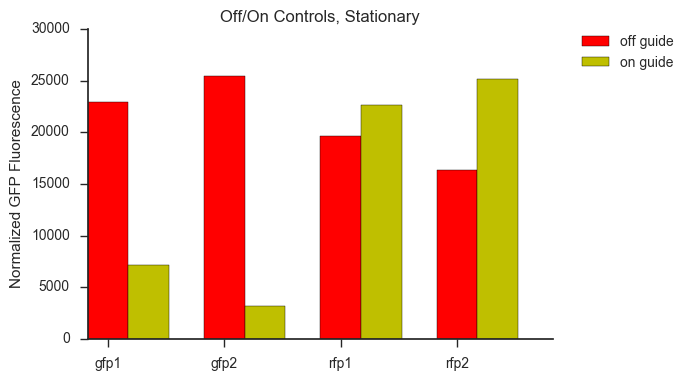

In [96]:
#Plot controls

N = 4
gfp_off_40 = [GFP_40[-1,0],GFP_40[-1,3],GFP_40[-1,6],GFP_40[-1,9]]
gfp_on_40 = [GFP_40[-1,1],GFP_40[-1,4],GFP_40[-1,7],GFP_40[-1,10]]

rfp_off_40 = [RFP_40[-1,0],RFP_40[-1,3],RFP_40[-1,6],RFP_40[-1,9]]
rfp_on_40 = [RFP_40[-1,1],RFP_40[-1,4],RFP_40[-1,7],RFP_40[-1,10]]

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, gfp_off_40, width, color='r')
rects2 = ax.bar(ind + width, gfp_on_40, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized GFP Fluorescence')
ax.set_title('Off/On Controls, Stationary')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('gfp1', 'gfp2', 'rfp1', 'rfp2'))

ax.legend((rects1[0], rects2[0]), ('off guide', 'on guide'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'gfp_controls_tp40' + '.svg'
dest = date + 'gfp_controls_tp40' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

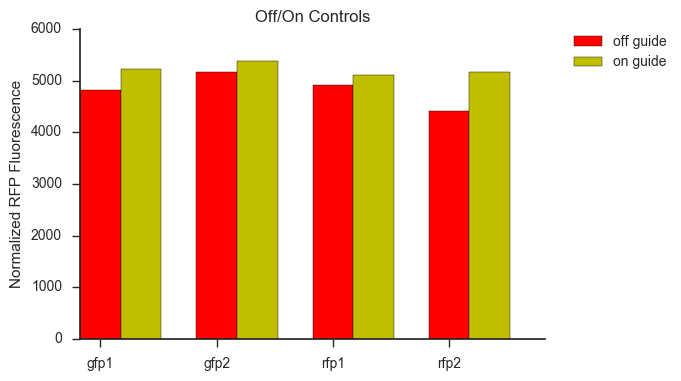

In [97]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind, rfp_off, width, color='r')
rects2 = ax.bar(ind + width, rfp_on, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized RFP Fluorescence')
ax.set_title('Off/On Controls')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('gfp1', 'gfp2', 'rfp1', 'rfp2'))

ax.legend((rects1[0], rects2[0]), ('off guide', 'on guide'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'rfp_controls' + '.svg'
dest = date + 'rfp_controls' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

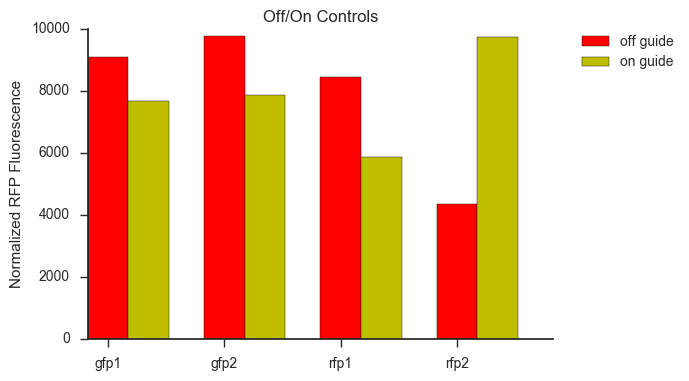

In [98]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind, rfp_off_40, width, color='r')
rects2 = ax.bar(ind + width, rfp_on_40, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized RFP Fluorescence')
ax.set_title('Off/On Controls')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('gfp1', 'gfp2', 'rfp1', 'rfp2'))

ax.legend((rects1[0], rects2[0]), ('off guide', 'on guide'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'rfp_controls' + '.svg'
dest = date + 'rfp_controls' + '.png'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

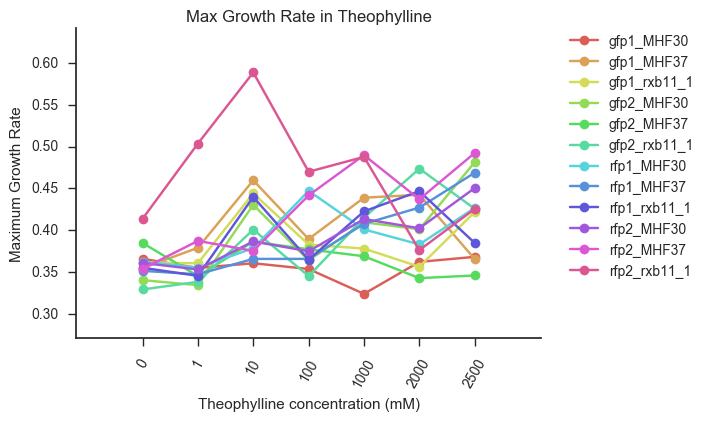

In [53]:
#Compare max growth rate for growth in theophylline

plt.figure()
sns.set_palette("hls", 12)

for i in range(len(titles)):
    plt.plot(ic,maxgrowth[:7,i],'o-',label=titles[i])
    
    plt.title('Max Growth Rate in Theophylline')
    plt.ylabel('Maximum Growth Rate')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation=60)
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'igRNA_GR' + '.svg'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

ValueError: x and y must have same first dimension

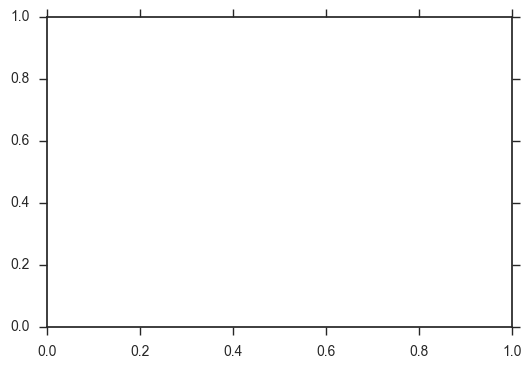

In [54]:
#Compare max OD for growth in theophylline

plt.figure()

for i in range(len(titles)):
    plt.plot(ic,maxOD[i,:8],'o-',label=titles[i])
    
    plt.title('Max OD in Theophylline')
    plt.ylabel('Maximum OD')
    plt.xlabel('Theophylline concentration (mM)')
    plt.xticks(ic, concs[::-1], rotation=60)
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

dest = date + 'igRNA_GR' + '.svg'

sns.despine()
sns.set_style("ticks")

plt.savefig(dest, bbox_inches='tight',dpi=300)
plt.show()
plt.close()

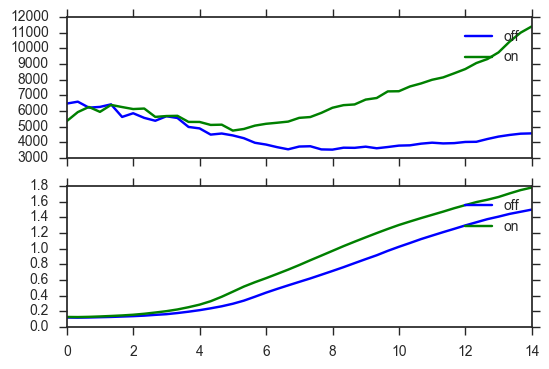

In [58]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, nRFP.loc[:,'H10'],'b',label = 'off')
ax1.plot(t, nRFP.loc[:,'H11'],'g',label = 'on')
ax2.plot(t, OD.loc[:,'H10'],'b',label = 'off')
ax2.plot(t, OD.loc[:,'H11'],'g',label = 'on')
ax1.legend()
ax2.legend()


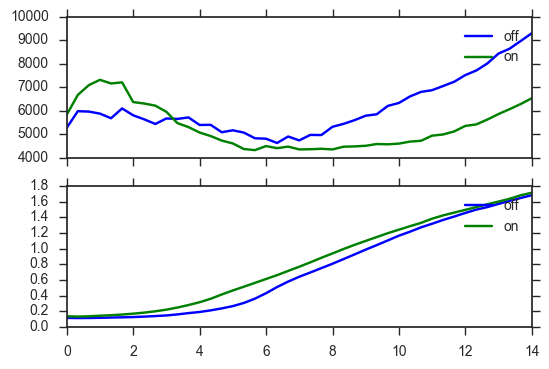

In [59]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, nRFP.loc[:,'H7'],'b',label = 'off')
ax1.plot(t, nRFP.loc[:,'H8'],'g',label = 'on')
ax2.plot(t, OD.loc[:,'H7'],'b',label = 'off')
ax2.plot(t, OD.loc[:,'H8'],'g',label = 'on')
ax1.legend()
ax2.legend()


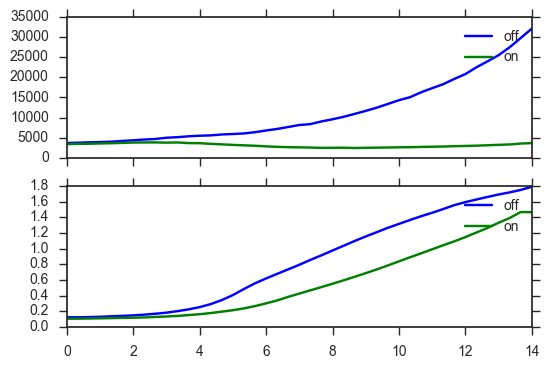

In [60]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, nGFP.loc[:,'H4'],'b',label = 'off')
ax1.plot(t, nGFP.loc[:,'H5'],'g',label = 'on')
ax2.plot(t, OD.loc[:,'H4'],'b',label = 'off')
ax2.plot(t, OD.loc[:,'H5'],'g',label = 'on')
ax1.legend()
ax2.legend()


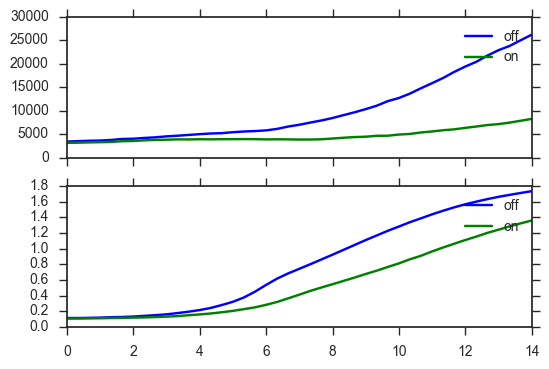

In [61]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, nGFP.loc[:,'H1'],'b',label = 'off')
ax1.plot(t, nGFP.loc[:,'H2'],'g',label = 'on')
ax2.plot(t, OD.loc[:,'H1'],'b',label = 'off')
ax2.plot(t, OD.loc[:,'H2'],'g',label = 'on')
ax1.legend()
ax2.legend()


In [28]:
maxind

array([ 19.,  16.,  18.,  15.,  20.,  19.,  14.,  19.,  16.,  17.,  16.,
         9.,  21.,  12.,  13.,  17.,  17.,  12.,  13.,  17.,  16.,  10.,
        17.,   8.,  12.,   9.,   9.,   9.,  18.,  11.,   8.,   9.,   8.,
         9.,   8.,   8.,  20.,  13.,  13.,  12.,  24.,  17.,   6.,  17.,
        17.,  10.,   9.,   8.,  21.,   9.,  12.,  12.,  17.,  10.,   9.,
        12.,   9.,   9.,   9.,   8.,  10.,  47.,  16.,  10.,  16.,   9.,
         9.,  10.,   9.,   9.,   8.,   6.,  19.,  11.,  10.,   9.,  21.,
         9.,   8.,  10.,  10.,   9.,   6.,   8.,  16.,  18.,  46.,  14.,
        48.,  44.,  17.,  12.,   3.,  15.,  13.,   0.])

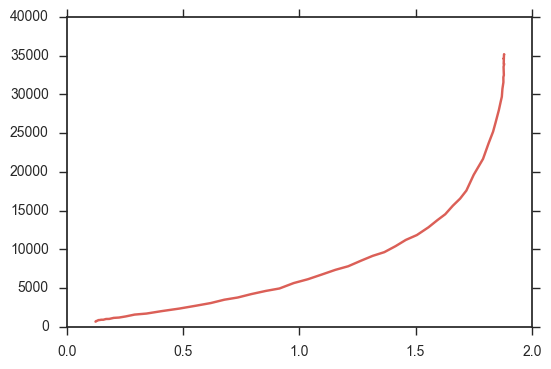

In [24]:
plt.plot(OD.loc[:,'H4'],mRFP.loc[:,'H4'])

In [25]:
sfGFP

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,271.0,325.0,305.0,316.0,256.0,320.0,389.0,333.0,349.0,364.0,...,201.0,456.0,359.0,209.0,391.0,550.0,200.0,428.0,509.0,194.0
1,265.0,326.0,314.0,317.0,254.0,317.0,403.0,337.0,354.0,372.0,...,204.0,465.0,367.0,208.0,396.0,551.0,206.0,424.0,501.0,199.0
2,275.0,346.0,328.0,337.0,265.0,333.0,427.0,345.0,373.0,391.0,...,206.0,487.0,377.0,207.0,406.0,577.0,208.0,448.0,524.0,195.0
3,290.0,367.0,345.0,356.0,273.0,349.0,447.0,364.0,396.0,410.0,...,205.0,510.0,392.0,211.0,421.0,619.0,207.0,468.0,560.0,197.0
4,299.0,395.0,372.0,380.0,282.0,364.0,485.0,388.0,420.0,432.0,...,206.0,546.0,410.0,215.0,447.0,667.0,208.0,495.0,593.0,195.0
5,313.0,418.0,401.0,405.0,298.0,382.0,527.0,406.0,451.0,458.0,...,209.0,593.0,429.0,208.0,480.0,730.0,209.0,525.0,642.0,201.0
6,334.0,465.0,437.0,433.0,320.0,413.0,574.0,447.0,497.0,503.0,...,205.0,644.0,449.0,211.0,505.0,799.0,211.0,576.0,711.0,200.0
7,360.0,517.0,485.0,482.0,344.0,444.0,649.0,488.0,553.0,555.0,...,200.0,715.0,465.0,211.0,550.0,885.0,211.0,629.0,801.0,198.0
8,393.0,574.0,538.0,532.0,362.0,478.0,722.0,533.0,615.0,619.0,...,205.0,790.0,491.0,210.0,600.0,1019.0,211.0,684.0,892.0,197.0
9,437.0,654.0,610.0,611.0,408.0,523.0,828.0,612.0,703.0,704.0,...,208.0,910.0,505.0,212.0,665.0,1148.0,208.0,755.0,1010.0,196.0
